<a href="https://colab.research.google.com/github/lourencocavalcante/Advanced-Topics-in-Environmental-Modeling/blob/main/Com_fun%C3%A7%C3%B5es_importantes_INPE_CAP351_ProjetoFinal_RainClassifier_Lourenco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-351 Neurocomputação**

**Professor:**
*Dr. Marcos Goncalves Quiles*

**Aluno:**
*Lourenço José Cavalcante Neto*

---

**PROJETO FINAL:  Implementação e treino de um modelo de Rede Neural para predição de chuva em curtíssimo prazo a partir de dados metorológicos oriundos do equipamento disdrômetro RD80**

* Um projeto de ML com EDA e modelo que ajuda a prever a chuva do instante seguinte treinando modelo de classificação na variável de destino Class_Rain


2. Predição. Treinar um modelo para predizer o valor de uma variável no instante **t+k**. O modelo deve receber os dados da série temporal (instantes anteriores a **t** – verificar tamanho da janela) e predizer um favor futuro. **k** a distância da predição. *Por exemplo, podemos alimentar um modelo com dados de uma dada empresa (i.e. **PETR3**) e tentar predizer qual será o valor da ação daqui **5 dias (k==5)**.*


# **Descrição do problema**
Este conjunto de dados contém cerca de 2 anos de observações meteorológicas diárias oriundos de dois equipamentos ( Radiômetro de Microondas MP3000A e o Disdrômetro RD80) instalados nas proximidades da torre ATTO, em sítio chamado Campina, na região amazônica.

Rain Intensity é a variável de destino na qual será utilizada para predizer a chuva. Significa - choveu no dia seguinte, sim ou não? Esta coluna é Sim se a chuva naquele dia foi maior que 0.1 mm/h.

# **Objetivo**
O presente trabalho tem por objetivo implementar e treinar um modelo de rede neural **LSTM (Long Short Term Memory)** para predição de chuva com base nos dados do disdrômetro **RD80**. Este equipamento mede adistribuição das gotas de chuva que chegam à superfície. O modelo computacional contribuirá coma a capacidade de antecipar informações sobre "estar chovendo" ou "não".

# **Introdução**
Para o desenvolvimento do presente trabalho, inicialmente partirei de uma breve visualização dos dados do nosso Dataset. Em seguida, será implementado e treinando um modelo LSTM, tal qual será utilizado para predizer a ocorrência de chuva.

# **Recurrent Neural Network (RNN)**
Uma (RNN) é uma classe de redes neurais que inclui conexões ponderadas dentro de uma camada. Como as RNNs incluem loops, elas podem armazenar informações ao processar novas entradas. Essa memória os torna ideais para tarefas de processamento onde as entradas anteriores devem ser consideradas (no nosso caso, dados da série temporal). 

**Long Short Term Memory (LSTM)**

Em resumo, uma célula LSTM pode aprender a reconhecer uma entrada importante (que é o papel do input gate), armazená-la no estado de longo prazo, aprender a preservá-la pelo tempo necessário (esse é o papel do forget gate) e aprender a extraí-la sempre que for preciso. Isso explica por que elas têm sido surpreendentemente bem-sucedidas em capturar padrões de longo prazo em séries temporais.

<img src="https://github.com/lourencocavalcante/Neurocomputacao/blob/1494f13955de226380c002fe2774d8641ca2efc6/Figuras/RNN_LSTM.png?raw=true" width = 600 align="left">


# **Bibliotecas/Pacotes**

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime

import numpy as np
import seaborn as sns
import missingno as msno

import category_encoders as ce

from math import sqrt
import matplotlib.pyplot as plt
from array import array
import datetime
import time
import math
import calendar

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Flatten
from keras.activations import sigmoid, softmax

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, plot_confusion_matrix, mean_squared_error, mean_absolute_error,confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler



# **Dataset**

Os Dados são de um equipamento chamado Disdrômetro RD80 (também conhecido como Joss), instalado próximo à torre ATTO, em um sítio chamado Campina, na região amazônica, nos quais foram adquiridos e salvos no google Drive. Este equipamento mede a distribuição das gotas de chuva que chegam à superfície.  Os dados são referente ao período de **17/03/2020** à **29/06/2022**,

**Importação, formatação, tratamento e visualização dos dados**

In [ ]:
#Vamos baixar os dados do Google Drive para o ambiente de execução do nosso Notebook
!gdown --id 15BiqUppgOvLOZUVRLFxcxdmP5ZQxLZE2

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15BiqUppgOvLOZUVRLFxcxdmP5ZQxLZE2
To: /content/df_RD80_FINAL.csv
100% 38.4M/38.4M [00:00<00:00, 94.6MB/s]


**Pré-processamento e visualização os dados**

O primeiro passo é abrir o CSV com o Pandas. Em uma visão inicial dos dados, temos:

In [ ]:
#Carregar o Dataset e criar o Dataframe
df_RD80 = pd.read_csv("/content/df_RD80_FINAL.csv",parse_dates=[0], index_col=[0])
df_RD80_final = pd.DataFrame(df_RD80)

#df_RD80_final= df_RD80_final.query("(Month != 'Jun' and Month != 'Sep' and Month != 'Oct' and Month != 'Aug' and Month != 'Jul')")
#df_RD80_final= df_RD80_final.query("(Month != 'Jun' and Month != 'Sep' and Month != 'Oct' and Month != 'Aug' and Month != 'Jul')")


In [ ]:
#Aqui verificamos o tamanho do Dataset e quantidade de atributos 
print('Tamanho do dataset: ',df_RD80_final.shape[0], ' - Quantidade de atributos: ', df_RD80_final.shape[1])

Tamanho do dataset:  5782  - Quantidade de atributos:  19


In [ ]:
df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] > 0].head(n=2).append(df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] == 0].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain
417,2020-03-17 20:49:00,2020-03-17,2020,Mar,Tuesday,20:49:00,23.55615,15159.06445,1.06382,1.86399,60.0,0,0,1,0,0,3,Chuva forte
418,2020-03-17 20:50:00,2020-03-17,2020,Mar,Tuesday,20:50:00,14.56254,6636.11426,0.72363,1.61044,60.0,0,0,1,0,0,3,Chuva forte
346966,2022-08-30 22:23:00,2022-08-30,2022,Aug,Tuesday,22:23:00,0.00000,0.00000,0.00000,0.00000,60.0,0,0,0,0,1,0,Não choveu
346967,2022-08-30 22:24:00,2022-08-30,2022,Aug,Tuesday,22:24:00,0.00000,0.00000,0.00000,0.00000,60.0,0,0,0,0,1,0,Não choveu


# **Modelo de Rede Neural para predição da chuva**

Vamos adicionar uma coluna extra (coluna: **Rainfall_Now**) ao conjunto de dados existente, na qual seu valor será de acordo com a ocorrência de chuva naquele instante/minuto e que será a nossa variável de destino.

Regras:
* Rainfall_Now = **1** (Com presença de chuva)
* Rainfall_Now = **0** (Sem presença de chuva)

In [ ]:
#Aqui criamos a coluna Rainfall_Now com preenchimento padrão 1 (Com presença de chuva)
df_RD80_final['Rainfall_Now'] = '1'

#Olhamos a variável Rain_Intensity_mm_h para saber se há registro de chuva e atualizamos
#a variável Rainfall_Now de acordo com o rsultado encontrado.
df_RD80_final['Rainfall_Now'][df_RD80_final['Rain_Intensity_mm_h'] == 0 ] = '0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Vamos converter o "Datetime" em um objeto datetime para que seja mais fácil realizar outras manipulações
df_RD80_final['Datetime'] = df_RD80_final.Datetime.astype('datetime64')

#Dividindo a coluna hora do dia em diferentes sessões em um dia
df_RD80_final=df_RD80_final.assign(session=pd.cut(df_RD80_final.Datetime.dt.hour,
                              [0,6,12,18,23],
                              labels=['Night','Morning','Afternoon','Evening'],
                              include_lowest=True))

In [ ]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] > 0].head(n=2).append(df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] == 0].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain,Rainfall_Now,session
417,2020-03-17 20:49:00,2020-03-17,2020,Mar,Tuesday,20:49:00,23.55615,15159.06445,1.06382,1.86399,60.0,0,0,1,0,0,3,Chuva forte,1,Evening
418,2020-03-17 20:50:00,2020-03-17,2020,Mar,Tuesday,20:50:00,14.56254,6636.11426,0.72363,1.61044,60.0,0,0,1,0,0,3,Chuva forte,1,Evening
346966,2022-08-30 22:23:00,2022-08-30,2022,Aug,Tuesday,22:23:00,0.00000,0.00000,0.00000,0.00000,60.0,0,0,0,0,1,0,Não choveu,0,Evening
346967,2022-08-30 22:24:00,2022-08-30,2022,Aug,Tuesday,22:24:00,0.00000,0.00000,0.00000,0.00000,60.0,0,0,0,0,1,0,Não choveu,0,Evening


Vamos ver o percentual de chuva para todo o período de dados.

In [ ]:
tot_choveu, tot_nao_choveu = round(df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] > 0].Rain_Intensity_mm_h.count()), round(df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] == 0].Rain_Intensity_mm_h.count())

soma = tot_choveu + tot_nao_choveu

print(f'Total de registros verificados: {soma}\n')
print(f'Total de registros (CHUVA SIM): {tot_choveu} ({round((tot_choveu*100/soma), 2)}%)')
print(f'Total de registros (CHUVA NÃO): {tot_nao_choveu} ({round((tot_nao_choveu*100/soma), 2)}%)')



Total de registros verificados: 346968

Total de registros (CHUVA SIM): 23061 (6.65%)
Total de registros (CHUVA NÃO): 323907 (93.35%)


In [ ]:
cont_reg_rain_year = df_RD80_final.groupby('Year').count()[['Rain_Intensity_mm_h']].sort_values(by = 'Rain_Intensity_mm_h', ascending = False)
cont_reg_rain_year

,Rain_Intensity_mm_h
Year,
2022,254061
2021,85256
2020,7651


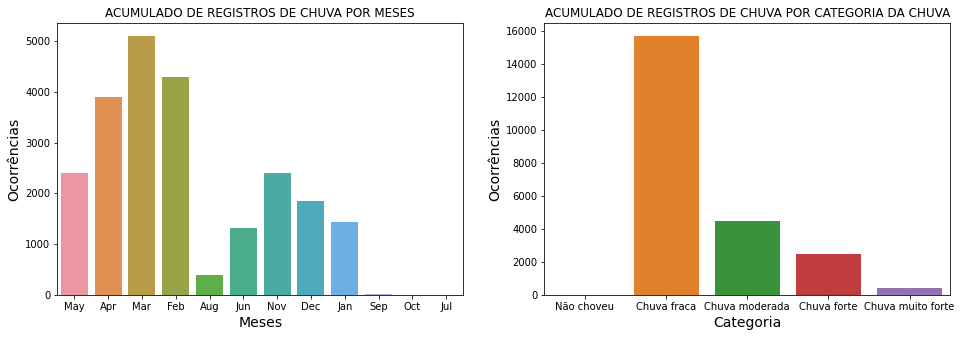

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(ax=axes[0], x='Month',data=df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] > 0], order = df_RD80_final['Month'].value_counts().index)
axes[0].set_title('ACUMULADO DE REGISTROS DE CHUVA POR MESES')
axes[0].set_xlabel("Meses", fontdict={'fontsize':14})
axes[0].set_ylabel("Ocorrências", fontdict={'fontsize':14})
sns.countplot(ax=axes[1], x='Class_Rain',data=df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] > 0], order = df_RD80_final['Class_Rain'].value_counts().index)
axes[1].set_title('ACUMULADO DE REGISTROS DE CHUVA POR CATEGORIA DA CHUVA')
axes[1].set_xlabel("Categoria", fontdict={'fontsize':14})
axes[1].set_ylabel("Ocorrências", fontdict={'fontsize':14})

plt.show()

Vamos separar os recursos **numéricos** e **categóricos**

In [ ]:
#Separando recursos numéricos e categóricos

categorical_features = [column_name for column_name in df_RD80_final.columns if df_RD80_final[column_name].dtype == 'O']
numerical_features=[column_name for column_name in df_RD80_final.columns if df_RD80_final[column_name].dtype != 'O']
print('Numéricos:',numerical_features,'\n')
print('Categoricos:',categorical_features)

Numéricos: ['Datetime', 'Year', 'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm', 'Time_integration_s', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain', 'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'session'] 

Categoricos: ['Date', 'Month', 'Day_of_week', 'Time', 'Class_Rain', 'Rainfall_Now']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


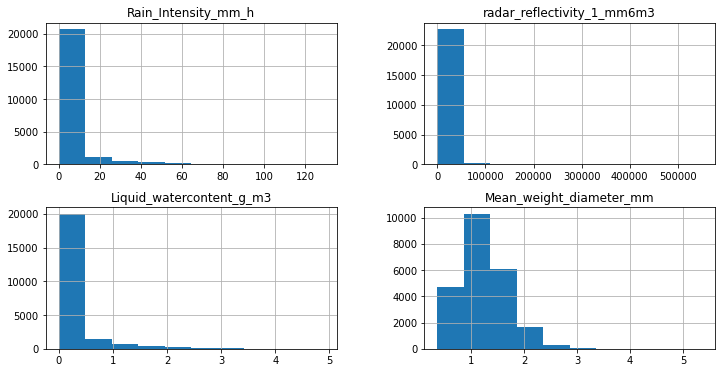

In [ ]:
#Vamos plotar o gráfico em dados numéricos
df_numeric = df_RD80_final[['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm']]
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
df_numeric.loc[df_numeric['Rain_Intensity_mm_h'] > 0].hist(ax=ax)

plt.show()

## **Encontrando as Correlações**

In [ ]:
df_RD80_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346968 entries, 0 to 346967
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Datetime                    346968 non-null  datetime64[ns]
 1   Date                        346968 non-null  object        
 2   Year                        346968 non-null  int64         
 3   Month                       346968 non-null  object        
 4   Day_of_week                 346968 non-null  object        
 5   Time                        346968 non-null  object        
 6   Rain_Intensity_mm_h         346968 non-null  float64       
 7   radar_reflectivity_1_mm6m3  346968 non-null  float64       
 8   Liquid_watercontent_g_m3    346968 non-null  float64       
 9   Mean_weight_diameter_mm     346968 non-null  float64       
 10  Time_integration_s          346968 non-null  float64       
 11  Light_Rain                  346968 non-

In [ ]:
#Modificanto o tipo da coluna Rainfall_Now para (int)
df_RD80_final[['Rainfall_Now']] = df_RD80_final[['Rainfall_Now']].astype(int)

HeatMap - Variáveis categóricas VS Númericas

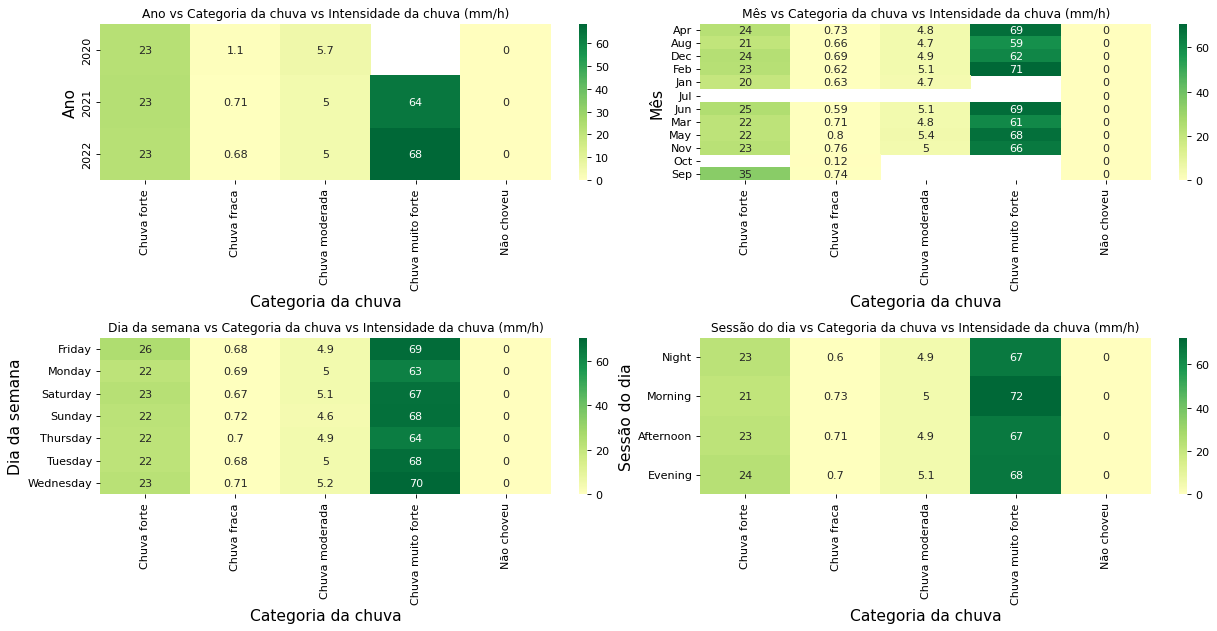

In [ ]:
queres = ['Year', 'Month','Day_of_week','session']
names = ['Ano', 'Mês','Dia da semana','Sessão do dia']


fig = plt.figure(figsize=(16,8),dpi=80)
ax = fig.gca()
#plt.suptitle('HeatMap - Variáveis categóricas VS Númericas', size=14)
for res in range(0,4):
  result = pd.pivot_table(data=df_RD80_final, index=queres[res], columns='Class_Rain', values='Rain_Intensity_mm_h')
  plt.subplot(2,2,res+1)
  heatmap = sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
  heatmap.set_title(names[res] + ' vs Categoria da chuva vs Intensidade da chuva (mm/h)', fontdict={'fontsize':11});
  plt.ylabel(names[res], fontdict={'fontsize':14})
  plt.xlabel("Categoria da chuva", fontdict={'fontsize':14})
  plt.tight_layout()
  plt.savefig('heatmap2.png')
plt.show()

**Encontrando as Correlações no Heatmap**

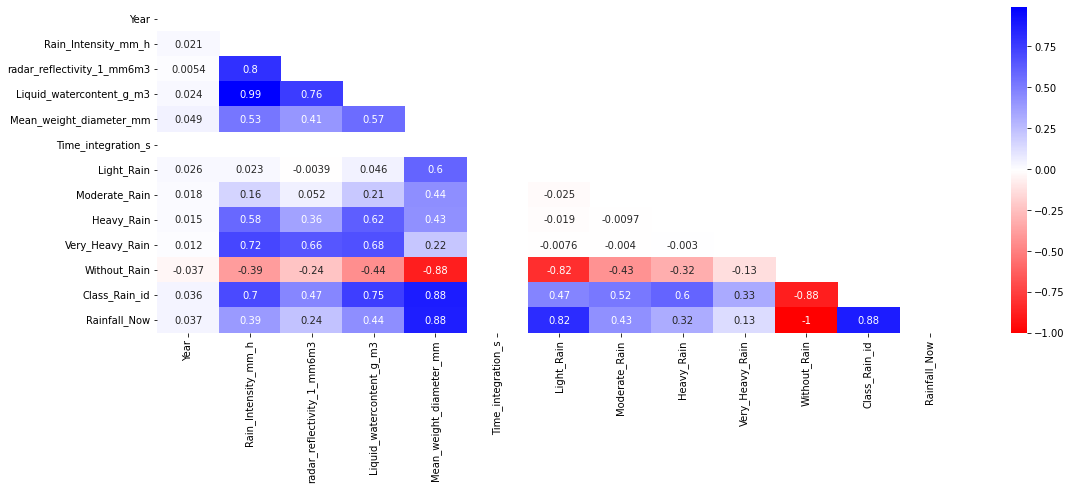

In [ ]:
#Encontrando a Correlação no Heatmap

matrix = np.triu(df_RD80_final.corr())
plt.figure(figsize=(18,6));
sns.heatmap(df_RD80_final.corr(),mask=matrix, annot=True, cmap='bwr_r');

Vamos selecionar somente as colunas que iremos utilizar a partir daqui.

In [ ]:
#df_RD80_final.drop('Datetime', axis = 1, inplace = True)

In [ ]:
df_RD80_final.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain',
       'Rainfall_Now', 'session'],
      dtype='object')

In [ ]:
data_x = df_RD80_final.drop(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time' ,
       'Time_integration_s', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain',
       'Rainfall_Now', 'session'], axis=1)

data_y = df_RD80_final[['Rainfall_Now']]


In [ ]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346968 entries, 0 to 346967
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Rain_Intensity_mm_h         346968 non-null  float64
 1   radar_reflectivity_1_mm6m3  346968 non-null  float64
 2   Liquid_watercontent_g_m3    346968 non-null  float64
 3   Mean_weight_diameter_mm     346968 non-null  float64
dtypes: float64(4)
memory usage: 13.2 MB


In [ ]:
scaler = RobustScaler()
data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)

In [ ]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346968 entries, 0 to 346967
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Rain_Intensity_mm_h         346968 non-null  float64
 1   radar_reflectivity_1_mm6m3  346968 non-null  float64
 2   Liquid_watercontent_g_m3    346968 non-null  float64
 3   Mean_weight_diameter_mm     346968 non-null  float64
dtypes: float64(4)
memory usage: 10.6 MB


**Vamos dividir os dados em Treino e Teste**

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size = 0.25, random_state=42) #25% Test

In [ ]:
# treino, teste, cv com 0.6, 0.2 e 0.2 proporções

x, X_test, y, Y_test = train_test_split(data_x, data_y, test_size=0.2, train_size=0.8)

X_train, x_cv, Y_train, y_cv = train_test_split(x, y, test_size = 0.25, train_size =0.75)

In [ ]:
print(data_x.shape,X_train.shape,X_test.shape)

(346968, 4) (208180, 4) (69394, 4)


## **Definições do Modelo de Rede Neural**

In [ ]:
EPOCHS = 500
batch_size = 128
input_dim = len(X_train.columns)

# SGD como função de otimização
sgd = tf.keras.optimizers.SGD(learning_rate= 0.01, momentum = 0.6)

# Instancia de um modelo de classificação binária
model = keras.Sequential(
    [
        keras.layers.Dense(128, input_dim=input_dim, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(l=0.02), activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(l=0.02),activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(l=0.02),activation="relu"),
        keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(l=0.02),activation="relu"),
        keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(l=0.02),activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ]
)

# Instancia uma função de perda logística que espera alvos de número inteiro.
binary_crossentropy = tf.keras.losses.BinaryCrossentropy()

# Instancia uma métrica de precisão.
accuracy = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    0.0015, decay_steps=5000, decay_rate=0.95, staircase=True
)

# Adicionando as funções ao modelo

#optimizer=keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss=binary_crossentropy, metrics=[accuracy])


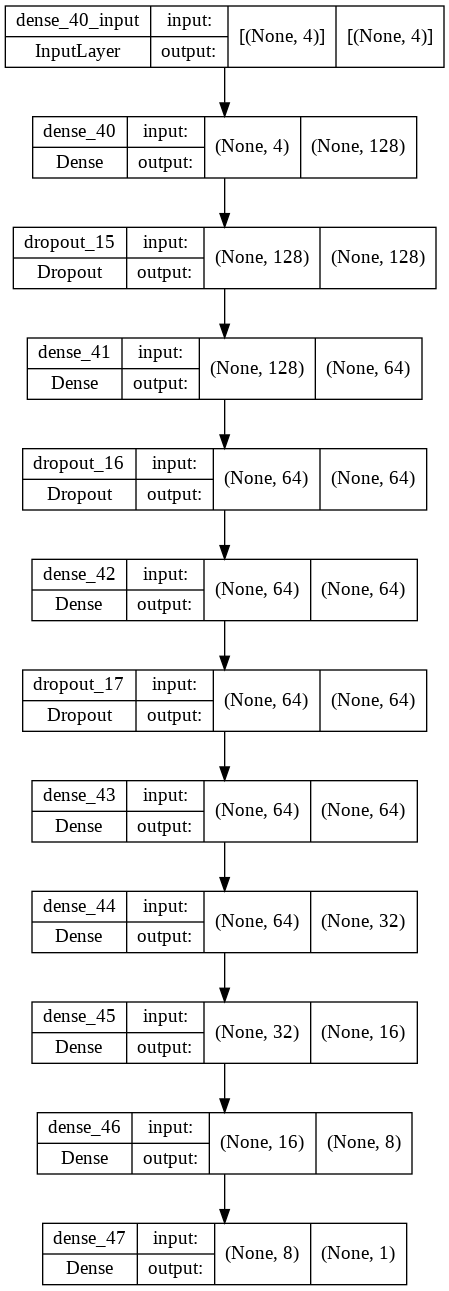

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               640       
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 64)               

In [ ]:
df_RD80_final['Minuto'] = pd.to_datetime(df_RD80_final['Datetime']).dt.minute

In [ ]:
df_RD80_final = df_RD80_final.loc[df_RD80_final['Minuto'] == 1]

## **Treinamento do modelo**

In [ ]:
# Treino loops (epocas)
history = model.fit(X_train, Y_train, validation_data=((x_cv, y_cv)), epochs=EPOCHS, batch_size=batch_size)

## **Resultados do Treinamento**

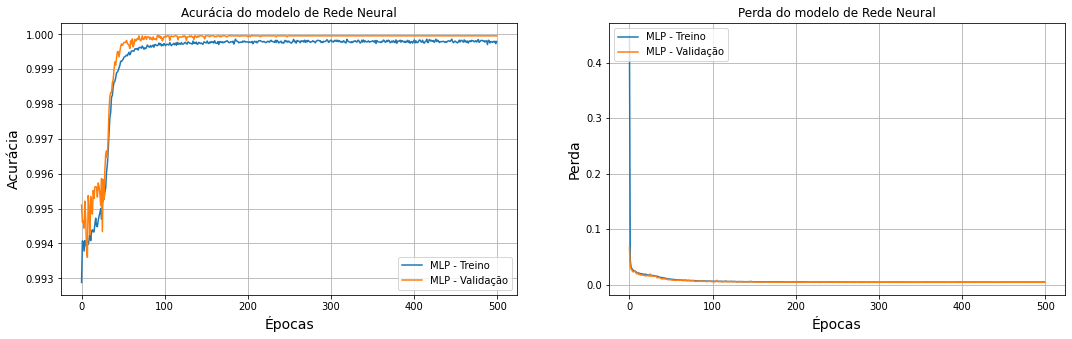

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(history.history['binary_accuracy'])
ax1.plot(history.history['val_binary_accuracy'])
ax1.set_title('Acurácia do modelo de Rede Neural')
ax1.set_ylabel('Acurácia',fontdict={'fontsize':14})
ax1.set_xlabel('Épocas',fontdict={'fontsize':14})
ax1.legend(['MLP - Treino', 'MLP - Validação'], loc='lower right')
ax1.grid()

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Perda do modelo de Rede Neural')
ax2.set_ylabel('Perda',fontdict={'fontsize':14})
ax2.set_xlabel('Épocas',fontdict={'fontsize':14})
ax2.legend(['MLP - Treino', 'MLP - Validação'], loc='upper left')
ax2.grid()

Qual foi a época do treino em que apresentou baixa perda de valor?

In [ ]:
res_epoch = np.argmin(history.history['val_loss'])
print(f'A época que apresentou uma baixa perda de valor foi: {res_epoch}')

A época que apresentou uma baixa perda de valor foi: 288


## **Avaliação do Modelo**

**Acurácia do Modelo**

In [ ]:
y_tested = Y_test.to_numpy()


y_pred1 = model.predict(X_test)
classes = y_pred1 > 0.5

m = tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None, threshold=0.5)
m.update_state(classes,y_tested)
m.result().numpy()

0.99992794

In [ ]:
print(f'Acurácia do Modelo : {round(model.evaluate(X_test, Y_test, verbose = 0)[1],4)}%')

Acurácia do Modelo : 0.9999%


In [ ]:
y_pred = model.predict(X_test)
y_pred = list(map(lambda x: np.argmax(x), y_pred))
print(f'F1 Score : {f1_score(Y_test, y_pred)} ')

F1 Score : 0.0 


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Modelo')
print('Teste loss:',   score[0])
print('Teste métricas:', score[1])
#print(f'Taxa de acerto: {round((accuracy_score(Y_test,y_pred)* 100),2)}%')
print('----------------------------------------')

2169/2169 [==============================] - 6s 3ms/step - loss: 0.0045 - binary_accuracy: 0.9999
Modelo
Teste loss: 0.004466751124709845
Teste métricas: 0.9999279379844666
----------------------------------------


**Matriz de confusão**

A matriz de confusão nos permitirá visualizar facilmente quantos exemplos foram classificados corretamente e erroneamente em cada classe, que ajuda a entender se o modelo está favorecendo uma classe em detrimento da outra.

In [ ]:
def make_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)

    group_names = ['True Negativo','False Positivo','False Negativo','True Positivo']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    categories = ['Sem chuva','Com chuva']
    fig = plt.figure(figsize=(8,6),dpi=80)
    ax = fig.gca()
    plt.title("Matriz de confusão",fontdict={'fontsize':16})
    sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
    plt.ylabel('Rótulo verdadeiro',fontdict={'fontsize':14})
    plt.xlabel('Rótulo previsto',fontdict={'fontsize':14})
    plt.show()

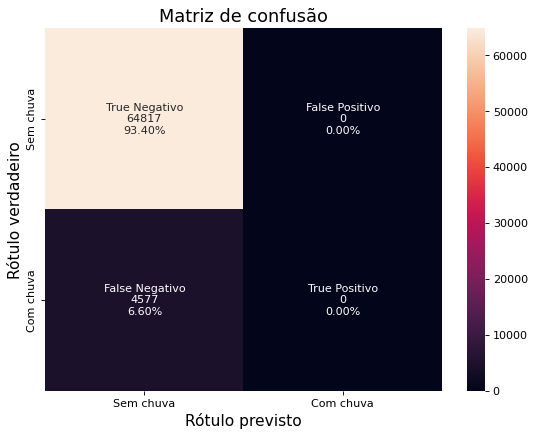

In [ ]:
make_confusion_matrix(Y_test, y_pred)

# **Classificação da chuva usando Redes Neurais Multi-Layer Perceptron (MLP)**

Neural Networks (MLPs): camadas usando combinações lineares de recursos com uma função de ativação não linear.

Redes do tipo Multi-Layer Perceptron (MLP), são estruturas organizadas em múltiplas camadas, capazes de aprender padrões, e identificar classificações de saída em qualquer modelo multivariado.A figura abaixo ilustra a configuração de uma rede em multicamadas e suas conexões sinápticas.

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score, plot_confusion_matrix, mean_squared_error, mean_absolute_error,confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Flatten
from keras.activations import sigmoid, softmax


In [ ]:
#Vamos baixar os dados do Google Drive para o ambiente de execução do nosso Notebook
#!gdown --id 15BiqUppgOvLOZUVRLFxcxdmP5ZQxLZE2

#!gdown --id 1vV99gFuJ7i8MXXjFhEAsF3w1988ZNTQ_

!gdown --id 1-OrjDXmZtcgtC25HVrH52llyUmclvpXs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-OrjDXmZtcgtC25HVrH52llyUmclvpXs
To: /content/df_MP3000A_RD80_final.csv
100% 508M/508M [00:02<00:00, 239MB/s]


In [ ]:
#Carregar o Dataset e criar o Dataframe
df_RD80 = pd.read_csv("/content/df_MP3000A_RD80_final.csv",parse_dates=[0], index_col=[0])


In [ ]:
df_RD80['Day'] = pd.to_datetime(df_RD80['Datetime']).dt.day
df_RD80['Month_'] = pd.to_datetime(df_RD80['Datetime']).dt.month
df_RD80['Hour'] = pd.to_datetime(df_RD80['Datetime']).dt.hour
df_RD80['Minute'] = pd.to_datetime(df_RD80['Datetime']).dt.minute

In [ ]:
#df_RD80_final = df_RD80.query("(Minute == 00 or Minute == 15 or Minute == 30 or Minute == 45)")
df_RD80_final = df_RD80

In [ ]:
#Aqui verificamos o tamanho do Dataset e quantidade de atributos 
print('Tamanho do dataset: ',df_RD80_final.shape[0], ' - Quantidade de atributos: ', df_RD80_final.shape[1])

Tamanho do dataset:  1190466  - Quantidade de atributos:  53


In [ ]:
for index, row in df_RD80_final.iterrows():

    if (row['Rain_Intensity_mm_h'] >= 0.1) and (row['Rain_Intensity_mm_h'] <= 2.5):
      df_RD80_final.loc[index,'Light_Rain'] = 1
      df_RD80_final.loc[index,'Class_Rain'] = 'Chuva fraca'
      df_RD80_final.loc[index,'Class_Rain_id'] = 1
    elif(row['Rain_Intensity_mm_h']  > 2.5) and (row['Rain_Intensity_mm_h']  <= 10):
      df_RD80_final.loc[index,'Moderate_Rain'] = 1
      df_RD80_final.loc[index,'Class_Rain'] = 'Chuva moderada'
      df_RD80_final.loc[index,'Class_Rain_id'] = 2
    elif (row['Rain_Intensity_mm_h']  > 10) and (row['Rain_Intensity_mm_h']  <= 50):
      df_RD80_final.loc[index,'Heavy_Rain'] = 1
      df_RD80_final.loc[index,'Class_Rain'] = 'Chuva forte'
      df_RD80_final.loc[index,'Class_Rain_id'] = 3
    elif (row['Rain_Intensity_mm_h']  > 50):
      df_RD80_final.loc[index,'Very_Heavy_Rain'] = 1
      df_RD80_final.loc[index,'Class_Rain'] = 'Chuva muito forte'
      df_RD80_final.loc[index,'Class_Rain_id'] = 4
    else:
      df_RD80_final.loc[index,'Without_Rain'] = 1
      df_RD80_final.loc[index,'Class_Rain'] = 'Não choveu'
      df_RD80_final.loc[index,'Class_Rain_id'] = 0

In [ ]:
df_RD80_numeric = ['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm', 'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm', 'Cloud_Base_km']

In [ ]:
for  i in df_RD80_numeric:
    df_RD80_final[i][df_RD80_final[i] == -1273.14] = 0


for  i in df_RD80_numeric:
    df_RD80_final[i][df_RD80_final[i] == -999.99] = 0

In [ ]:
df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] > 0].head(n=2).append(df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] == 0].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,session,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,...,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain,Day,Month_,Hour,Minute
0,2022-01-17 13:47:00,2022-01-17,2022,Jan,Monday,13:47:00,Afternoon,0.14179,20.98903,0.01019,...,0.0,0.0,0.0,0.0,1.0,Chuva fraca,17,1,13,47
1,2022-01-17 13:48:00,2022-01-17,2022,Jan,Monday,13:48:00,Afternoon,0.15971,23.59070,0.01125,...,0.0,0.0,0.0,0.0,1.0,Chuva fraca,17,1,13,48
222191,2022-06-29 09:08:00,2022-06-29,2022,Jun,Wednesday,09:08:00,Morning,0.00000,0.10235,0.00088,...,0.0,0.0,0.0,1.0,0.0,Não choveu,29,6,9,8
222192,2022-06-29 09:09:00,2022-06-29,2022,Jun,Wednesday,09:09:00,Morning,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,1.0,0.0,Não choveu,29,6,9,9


In [ ]:
df_RD80_final['Datetime'] = df_RD80_final.Datetime.astype('datetime64')

In [ ]:
df_RD80_final = df_RD80_final.set_index('Datetime')

In [ ]:
# Agrupamento de dados e gerar um novo DF
# freq="1W", freq="1D", freq="1min"
df_RD80_final = df_RD80_final.groupby(pd.Grouper(freq='30min')).mean()

In [ ]:
df_RD80_final = df_RD80_final.reset_index('Datetime')

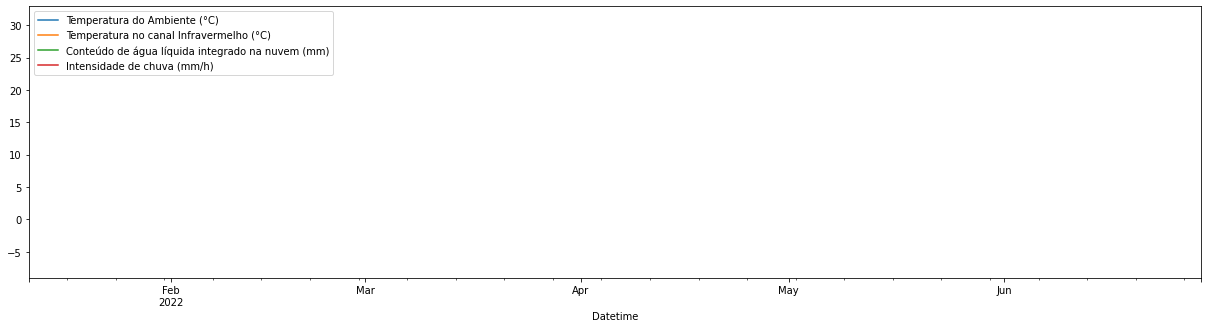

In [ ]:
#Plotando o acumulado da intensidade da chuva por horário do dia
#df_RD80_filter = df_RD80_final.query("(Datetime >= '2022-05-19' and Datetime <= '2022-05-20')")
df_RD80_filter = df_RD80_final

ax = plt.gca()
plt.rcParams["figure.figsize"] = [21,5]

df_RD80_filter.plot(kind='line',x='Datetime',y="Tamb_K", label='Temperatura do Ambiente (°C)', ax=ax)
df_RD80_filter.plot(kind='line',x='Datetime',y="Tir_K", label='Temperatura no canal Infravermelho (°C)', ax=ax)
df_RD80_filter.plot(kind='line',x='Datetime',y="Int_Liquid_mm", label='Conteúdo de água líquida integrado na nuvem (mm)', ax=ax)
df_RD80_filter.plot(kind="line",x="Datetime",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)

In [ ]:
df_RD80_final.dtypes

Datetime                       object
Date                           object
Year                            int64
Month                          object
Day_of_week                    object
Time                           object
session                        object
Rain_Intensity_mm_h           float64
radar_reflectivity_1_mm6m3    float64
Liquid_watercontent_g_m3      float64
Mean_weight_diameter_mm       float64
Time_integration_s            float64
DataQuality                   float64
Tamb_K                        float64
Rh_percent                    float64
Pres_mb                       float64
Tir_K                         float64
Ch_22_234                     float64
Ch_22_500                     float64
Ch_23_034                     float64
Ch_23_834                     float64
Ch_25_000                     float64
Ch_26_234                     float64
Ch_28_000                     float64
Ch_30_000                     float64
Ch_51_248                     float64
Ch_51_760   

In [ ]:
df_RD80_final.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time', 'session',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain', 'Day',
       'Month_', 'Hour', 'Minute'],
      dtype='object')

In [ ]:
df_RD80_final = df_RD80_final.reindex(columns=['Datetime', 'Date', 'Year','Month_','Day', 'Hour', 'Minute', 'Month', 'Day_of_week', 'Time','session',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain'])

In [ ]:
# -999.99 significa os valores ausentes
df_RD80_final['Rain_Intensity_mm_h'] = df_RD80_final['Rain_Intensity_mm_h'].replace(-999.99, np.nan)

In [ ]:
# Interpolação dos valores ausentes
df_RD80_final = df_RD80_final.interpolate(method='akima')     

In [ ]:
#Verificando o recurso de chuva para os valores ausentes
df_RD80_final[df_RD80_final['Rain_Intensity_mm_h'].isnull()] 

,Datetime,Date,Year,Month_,Day,Hour,Minute,Month,Day_of_week,Time,...,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain


In [ ]:
df_RD80_final.columns

Index(['Datetime', 'Date', 'Year', 'Month_', 'Day', 'Hour', 'Minute', 'Month',
       'Day_of_week', 'Time', 'session', 'Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'DataQuality',
       'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K', 'Ch_22_234', 'Ch_22_500',
       'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000',
       'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804',
       'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500',
       'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800',
       'Int_Vapor_cm', 'Int_Liquid_mm', 'Cloud_Base_km', 'Light_Rain',
       'Moderate_Rain', 'Heavy_Rain', 'Very_Heavy_Rain', 'Without_Rain',
       'Class_Rain_id', 'Class_Rain'],
      dtype='object')

In [ ]:
df_RD80_final = df_RD80_final.drop(columns=['Datetime', 'Date', 'Month', 'Day_of_week', 'Time', 'session','Rain_Intensity_mm_h',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'DataQuality',   
        'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800',
       'Cloud_Base_km', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id'])
df_RD80_final.head()

,Year,Month_,Day,Hour,Minute,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Tamb_K,Rh_percent,Pres_mb,Tir_K,Int_Vapor_cm,Int_Liquid_mm,Class_Rain
222231,2022,1,11,12,30,0.0,0.0,0.00,0.00,0.00,0.00,46.972,0.000,Não choveu
222232,2022,1,11,12,30,0.0,0.0,27.70,78.49,1008.01,6.80,0.000,0.000,Não choveu
222233,2022,1,11,12,30,0.0,0.0,0.00,0.00,0.00,0.00,0.000,0.000,Não choveu
222234,2022,1,11,12,30,0.0,0.0,0.00,0.00,0.00,0.00,4.587,0.037,Não choveu
222235,2022,1,11,12,30,0.0,0.0,27.69,78.36,1007.91,6.67,0.000,0.000,Não choveu


In [ ]:
df_RD80_final.dtypes

Year                            int64
Month_                          int64
Day                             int64
Hour                            int64
Minute                          int64
radar_reflectivity_1_mm6m3    float64
Liquid_watercontent_g_m3      float64
Tamb_K                        float64
Rh_percent                    float64
Pres_mb                       float64
Tir_K                         float64
Int_Vapor_cm                  float64
Int_Liquid_mm                 float64
Class_Rain                     object
dtype: object

In [ ]:
df_RD80_final[df_RD80_final.columns[0:13]] = df_RD80_final[df_RD80_final.columns[0:13]].astype('float64')
df_RD80_final.dtypes

Year                          float64
Month_                        float64
Day                           float64
Hour                          float64
Minute                        float64
radar_reflectivity_1_mm6m3    float64
Liquid_watercontent_g_m3      float64
Tamb_K                        float64
Rh_percent                    float64
Pres_mb                       float64
Tir_K                         float64
Int_Vapor_cm                  float64
Int_Liquid_mm                 float64
Class_Rain                     object
dtype: object

In [ ]:
df_RD80_final['Class_Rain'].value_counts()

Não choveu           78120
Chuva fraca            824
Chuva moderada         241
Chuva forte            121
Chuva muito forte       32
Name: Class_Rain, dtype: int64

In [ ]:
# codificar os rótulos, convertendo-os de strings para inteiros
le = LabelEncoder()
labels = le.fit_transform(df_RD80_final['Class_Rain'].values)
labels

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
# realizar uma divisão de teste de treinamento, usando 75% dos dados para
# treinamento e 25% para avaliação
(x_train_rain, x_test_rain, y_train_rain, y_test_rain) = train_test_split(df_RD80_final[df_RD80_final.columns[0:13]].values, labels, random_state=3, test_size=0.25)
print('Tamanho do dataset para treinamento: ',len(x_train_rain))
print('Tamanho do dataset para validação: ',len(x_test_rain))

Tamanho do dataset para treinamento:  59503
Tamanho do dataset para validação:  19835


Para treinar uma rede MLP, os dados devem ser sempre dimensionados, pois são muito sensíveis a eles.

In [ ]:
sc=StandardScaler()

scaler = sc.fit(x_train_rain)
x_train_rain_scaled = scaler.transform(x_train_rain)
x_test_rain_scaled = scaler.transform(x_test_rain)

## **Definições do modelo**

In [ ]:
#Definições do modelo

MLP_model = MLPClassifier(hidden_layer_sizes=(50,10),
                        max_iter = 1000,activation = 'relu',random_state=42,
                        alpha=0.0005, batch_size=32,learning_rate='constant',
                        momentum=0.9, solver = 'adam', verbose=True)

# sobre a sintaxe para camadas ocultas: hidden_layer_sizes=(H1, H2, H3) significa TRÊS camadas ocultas de respectivos tamanhos (neurônios) H1, H2, H3 
# Enquanto hidden_layer_sizes=(H1,) significaria UMA camada oculta de respectivos tamanhos H1 e H2
# sobre iteração: max_iter - especifica um número de EPOCHS (= passando por todos os exemplos de treinamento)


# Treino do modelo MLP
history = MLP_model.fit(x_train_rain_scaled, y_train_rain)

Iteration 1, loss = 0.10728884
Iteration 2, loss = 0.02127111
Iteration 3, loss = 0.01054744
Iteration 4, loss = 0.00748017
Iteration 5, loss = 0.00656163
Iteration 6, loss = 0.00630711
Iteration 7, loss = 0.00604833
Iteration 8, loss = 0.00571665
Iteration 9, loss = 0.00596028
Iteration 10, loss = 0.00535602
Iteration 11, loss = 0.00536079
Iteration 12, loss = 0.00546093
Iteration 13, loss = 0.00522484
Iteration 14, loss = 0.00534242
Iteration 15, loss = 0.00518568
Iteration 16, loss = 0.00478711
Iteration 17, loss = 0.00502952
Iteration 18, loss = 0.00526321
Iteration 19, loss = 0.00496095
Iteration 20, loss = 0.00484040
Iteration 21, loss = 0.00494114
Iteration 22, loss = 0.00472117
Iteration 23, loss = 0.00488256
Iteration 24, loss = 0.00469240
Iteration 25, loss = 0.00450788
Iteration 26, loss = 0.00482528
Iteration 27, loss = 0.00465807
Iteration 28, loss = 0.00453165
Iteration 29, loss = 0.00467422
Iteration 30, loss = 0.00439857
Iteration 31, loss = 0.00475841
Iteration 32, los

## **Avaliação do modelo**

In [ ]:
# Fazendo previsões sobre nossos dados e mostrar uma pontuação de precisão
print("[INFO] Avaliação do modelo...")
predictions = MLP_model.predict(x_test_rain_scaled)
MLP_accur = accuracy_score(y_test_rain, predictions)
print(f'\nA pontuação de precisão da capacidade do modelo MLP de classificar a chuva é: {round((MLP_accur*100), 2)}%')

[INFO] Avaliação do modelo...

A pontuação de precisão da capacidade do modelo MLP de classificar a chuva é: 99.84%


In [ ]:
score_obj = dict(zip(['Accuracy Score'], [[MLP_accur]]))
score_df = pd.DataFrame(score_obj, index=['MLP'])
score_df

,Accuracy Score
MLP,0.998689


<Figure size 1280x480 with 0 Axes>

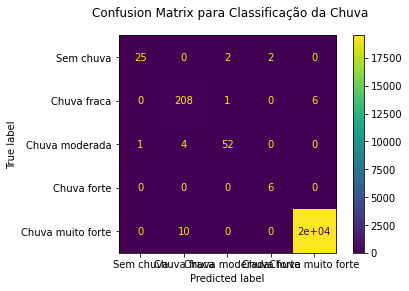

In [ ]:

categories = ['Sem chuva','Chuva fraca','Chuva moderada','Chuva forte','Chuva muito forte']
plt.figure(figsize=(16,6),dpi=80)
fig = plot_confusion_matrix(MLP_model, x_test_rain_scaled, y_test_rain, display_labels=categories)
fig.figure_.suptitle("Confusion Matrix para Classificação da Chuva")
plt.show()

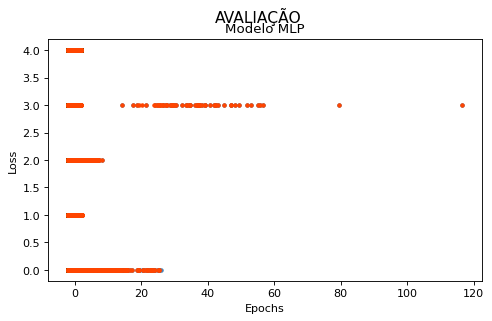

In [ ]:
plt.figure(figsize=(7,4),dpi=80)
plt.suptitle('AVALIAÇÃO', size=14)
y_rest = MLP_model.predict(x_train_rain_scaled)
plt.plot(x_train_rain_scaled, y_train_rain, '.', color='#4682B4')
plt.plot(x_train_rain_scaled, y_rest, '.',color='#FF4500')
plt.title('Modelo MLP')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test_rain, predictions))
rmse

0.09499711430746542

In [ ]:
print(classification_report(y_test_rain, predictions))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.94      0.97      0.95       215
           2       0.95      0.91      0.93        57
           3       0.75      1.00      0.86         6
           4       1.00      1.00      1.00     19528

    accuracy                           1.00     19835
   macro avg       0.92      0.95      0.93     19835
weighted avg       1.00      1.00      1.00     19835



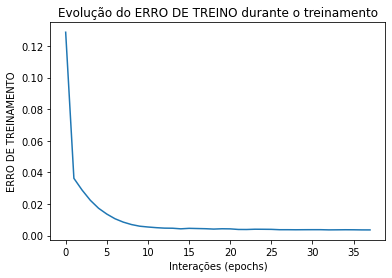

In [ ]:
# Plot the LEARNING CURVE
plt.title("Evolução do ERRO DE TREINO durante o treinamento")
plt.xlabel("Interações (epochs)")
plt.ylabel("ERRO DE TREINAMENTO")
plt.plot(MLP_model.loss_curve_)
plt.show()



In [ ]:
# Seleciona uma linha do dataframe aleatoriamente
class_real = []
res_class_predict = []
indexes = []

for contador in range(0,500):
  indexes.append(contador)
  df_RD80_class_real = df_RD80_final.sample(axis = 0)
  class_real.append(df_RD80_class_real['Class_Rain'])


  df_RD80_class_predict = df_RD80_class_real.drop(columns=['Class_Rain'])

  #Teste de classificação da chuva com o modelo

  result_predict_class = le.classes_[MLP_model.predict(np.array([df_RD80_class_predict]).reshape(1,-1))][0]
  res_class_predict.append(result_predict_class)

  


resultados = {'ID':indexes,'Class Real':class_real, 'Class Predita':res_class_predict}
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')

df_resultados = df_resultados.T

df_resultados.dropna(inplace=True)
df_resultados.reset_index(inplace=True, drop=True)


df_resultados.head(n=500)




,ID,Class Real,Class Predita
0,0,"1097155 Não choveu Name: Class_Rain, dtype:...",Chuva moderada
1,1,"1128459 Não choveu Name: Class_Rain, dtype:...",Chuva forte
2,2,"760722 Não choveu Name: Class_Rain, dtype: ...",Chuva forte
3,3,"224971 Não choveu Name: Class_Rain, dtype: ...",Chuva forte
4,4,"620414 Não choveu Name: Class_Rain, dtype: ...",Não choveu
...,...,...,...
495,495,"1156188 Não choveu Name: Class_Rain, dtype:...",Chuva forte
496,496,"238172 Não choveu Name: Class_Rain, dtype: ...",Chuva moderada
497,497,"907318 Não choveu Name: Class_Rain, dtype: ...",Chuva moderada
498,498,"549920 Não choveu Name: Class_Rain, dtype: ...",Chuva moderada


In [ ]:
'''score_test = dict(zip(['Resultado dos testes de Classificação'], [[class_real,res_class_predict]]))

score_test = pd.DataFrame(score_test, index=['Class Real', 'Class Predita'])
score_test'''

# **Considerações Finais**

No presente notebook, objetivou-se apresentar a implementação de um modelo de RNN - uma LSTM -, que fosse capaz de predizer a chuva. Face do Dataset utilizado e tendo como parâmetro os resultados dos testes, é possível inferir que o modelo treinado obteve resultados satifatórios. No entanto, sugere-se também que usar mais de 01 (uma) LSTM e diferentes parâmetros pode resultar em melhorias na predição da taxa.

A classificação multiclasse pode ser feita com uma abordagem de um contra o resto usando LogisticRegression, onde você pode especificar o solucionador numérico, o padrão é uma força de regularização razoável. Alternativamente, a classificação multiclasse pode ser feita com a ferramenta de rede neural MLPClassifier do sklearn, que usa propagação direta para calcular o estado da rede e, a partir daí, a função de custo, e usa propagação de volta como uma etapa para calcular as derivadas parciais da função de custo. Você também precisa especificar o solver para esta classe, e a arquitetura de rede específica deve ser escolhida pelo usuário. O MLPClassifier tem o útil atributo loss_curve_ que realmente armazena a progressão da função de perda durante o ajuste para fornecer algumas informações sobre o processo de ajuste. Uma boa maneira de visualizar um modelo de rede ajustado é traçar uma imagem do que faz com que cada neurônio oculto "fogue", ou seja, que tipo de vetor de entrada faz com que o neurônio oculto seja ativado próximo a 1.

# **Referências**

BASHEER, I. A.; HAJMEER, M. Artificial neural networks: fundamentals, computing, design, and application. Journal of Microbiological Methods, v. 43, p. 3–31, 2000

HAYKIN, Simon. Redes Neurais : princípios e prática. Traduzido por Paulo Martins Engel. 2. ed. Porto Alegre : Bookman, 2001. 900 p. il.

HSU, K. L.; GAO, X.; SOROOSHIAN, S.; GUPTA, H. V. Precipitation estimation from remotely sensed information using artificial neural networks. Journal of Applied Meteorology, v. 36, n. 9, p. 1176-1190, 1997.

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://sites.icmc.usp.br/andre/research/neural/MLP.htm

https://acervolima.com/diferenca-entre-ann-cnn-e-rnn/

KOVAKS, Z. L. Redes Neurais Artificiais: fundamentos e Aplicações. São Paulo: Acadêmica, 1996.

TAFNER, Malcon A.; XEREZ, Marcos de; RODRIGUES FILHO, Ilson W. Redes neurais artificiais : introdução e princípios de neurocomputação. Blumenau : Eko, 1995.

Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. “Neural Networks for Machine Learning Lecture 6a Overview of Mini--Batch Gradient Descent,” 2012.